
Sentiment Analysis in Python



    VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
    Roberta Pretrained Model from 🤗
    Huggingface Pipeline



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk




In [2]:
# read in data
df = pd.read_csv('DatasetIntel.csv')

In [3]:


# Assuming 'data.csv' is your dataset file
df = pd.read_csv('DatasetIntel.csv')

# Add a new column 'ID' with unique identifiers
df['ID'] = range(1, len(df) + 1)

# Now your dataframe 'df' has an 'ID' column with unique identifiers for each row
print(df)



                 category  rating  label  \
0      Home_and_Kitchen_5       5      0   
1      Home_and_Kitchen_5       5      0   
2      Home_and_Kitchen_5       5      0   
3      Home_and_Kitchen_5       1      0   
4      Home_and_Kitchen_5       5      0   
...                   ...     ...    ...   
5870  Sp1ts_and_Outdo1s_5       5      0   
5871  Sp1ts_and_Outdo1s_5       4      0   
5872  Sp1ts_and_Outdo1s_5       5      1   
5873  Sp1ts_and_Outdo1s_5       5      1   
5874  Sp1ts_and_Outdo1s_5       5      1   

                                                  text_    ID  
0     Love this!  Well made, sturdy, and very comf1t...     1  
1     love it, a great upgrade from the 1iginal.  I'...     2  
2     This pillow saved my back. I love the look and...     3  
3     Missing inf1mation on how to use it, but it is...     4  
4     Very nice set. Good quality. We have had the s...     5  
...                                                 ...   ...  
5870  there is a techni

In [4]:
df.head()

,category,rating,label,text_,ID
0,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t...",1
1,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'...",2
2,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...,3
3,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is...",4
4,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...,5


In [5]:
df['text_'].values[0]

'Love this!  Well made, sturdy, and very comf1table.  I love it!Very pretty'

In [6]:
# it s provide the information about the number of rows and colums in an dataset
print(df.shape)

(5875, 5)


Quick EDA

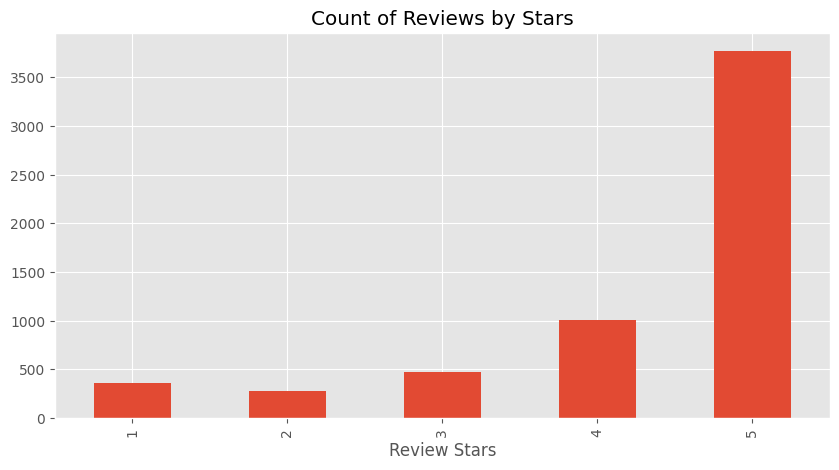

In [7]:
# here the value_count fn give information about the number of times each rating occurs
ax = df['rating'].value_counts().sort_index()\
    .plot(kind='bar',
           title='Count of Reviews by Stars',
             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

Basic NLTK

In [8]:
example = df['text_'][50]
print(example)

Perfect. They do exactly what I need them to do. I will keep them f1 a long time


In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Perfect', '.', 'They', 'do', 'exactly', 'what', 'I', 'need', 'them', 'to']

In [10]:
# this gives the tokens along with their speech
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Perfect', 'NNP'),
 ('.', '.'),
 ('They', 'PRP'),
 ('do', 'VBP'),
 ('exactly', 'RB'),
 ('what', 'WP'),
 ('I', 'PRP'),
 ('need', 'VBP'),
 ('them', 'PRP'),
 ('to', 'TO')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker/english_ace_multiclass.pickle[0m

  Searched in:
    - 'C:\\Users\\celia/nltk_data'
    - 'c:\\Program Files\\Python312\\nltk_data'
    - 'c:\\Program Files\\Python312\\share\\nltk_data'
    - 'c:\\Program Files\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\celia\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************



Step 1. VADER Seniment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

    This uses a "bag of words" approach:
        Stop words are removed
        each word is scored and combined to a total score.



In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia =  SentimentIntensityAnalyzer()

In [18]:
# COMPOUND is abbravtion of negative,netural,postive...which represent from how -ve to +ve
sia.polarity_scores('I am so HAPPY')

{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'compound': 0.6933}

In [19]:
sia.polarity_scores('it is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [20]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}

In [ ]:
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\celia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text_']
    myid = row['ID']  # Make sure 'ID' matches the actual column name
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/5875 [00:00<?, ?it/s]

In [ ]:
df

,category,rating,label,text_,ID
0,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t...",1
1,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'...",2
2,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...,3
3,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is...",4
4,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...,5
...,...,...,...,...,...
5870,Sp1ts_and_Outdo1s_5,5,0,there is a technique to use a small spoon to g...,5871
5871,Sp1ts_and_Outdo1s_5,4,0,Glad I got this. Not a bad quality product. ...,5872
5872,Sp1ts_and_Outdo1s_5,5,1,These small ice packs are used in my children'...,5873
5873,Sp1ts_and_Outdo1s_5,5,1,I go through a lot of riding gloves and this p...,5874


In [22]:
#  T is used to rotate horizontal
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')


In [23]:
# Now we have sentiment score and meta data
vaders.head()

,ID,neg,neu,pos,compound,category,rating,label,text_
0,1,0.000,0.325,0.675,0.9389,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t..."
1,2,0.000,0.591,0.409,0.8519,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'..."
2,3,0.000,0.611,0.389,0.7906,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...
3,4,0.078,0.633,0.289,0.7463,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is..."
4,5,0.000,0.719,0.281,0.7397,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...


Plot VADER result

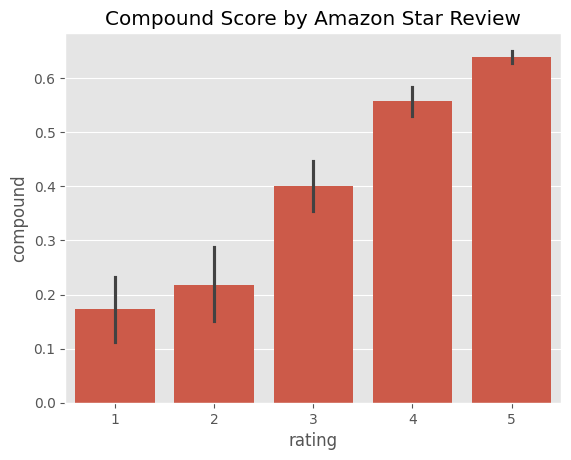

In [24]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

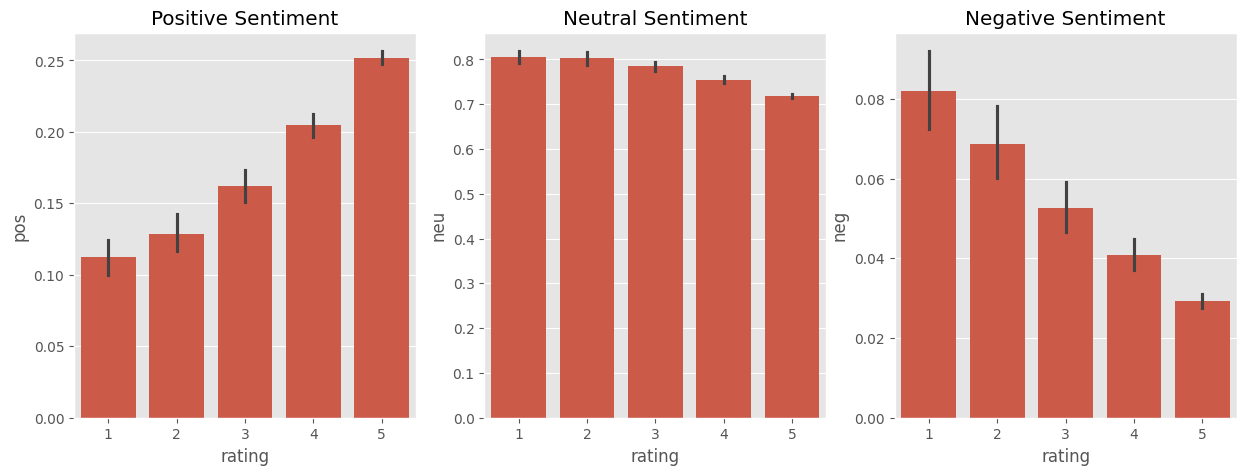

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')
plt.show()



Step 3. Roberta Pretrained Model¶

    Use a model trained of a large corpus of data.
    Transformer model accounts for the words but also the context related to other words.



In [13]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [14]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/c37a3484c55954cd75b336a85f1e0c023ae874f3a73b05d2418dd04828e293b1?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1713673921&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMzY3MzkyMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9jYXJkaWZmbmxwL3R3aXR0ZXItcm9iZXJ0YS1iYXNlLXNlbnRpbWVudC9jMzdhMzQ4NGM1NTk1NGNkNzViMzM2YTg1ZjFlMGMwMjNhZTg3NGYzYTczYjA1ZDI0MThkZDA0ODI4ZTI5M2IxP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=RGLUQCj5mtu3Qg0kfZZZSsCO2nacKAESX6OjZS91hhTfjr0kFlJhIZMWIUhTP8qRCFcjEmbhCkElEy0Ek2iIkXFm5YBdCCTeMEwZvo6%7E5stMxXjwYHyvaa6rLwj3jqTtJr7JwSeCZhoPE0byXmt5oC%7E%7EZIQCP7m-YdEyOD75TA4ePnCPeCl9fzb0BFB%7ERf1XykAwZ%7EPtifT3PlRnmTsluDEPcUFtqA7mVo9ad6WaZzRk

pytorch_model.bin:  34%|###3      | 168M/499M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/c37a3484c55954cd75b336a85f1e0c023ae874f3a73b05d2418dd04828e293b1?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1713673921&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMzY3MzkyMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9jYXJkaWZmbmxwL3R3aXR0ZXItcm9iZXJ0YS1iYXNlLXNlbnRpbWVudC9jMzdhMzQ4NGM1NTk1NGNkNzViMzM2YTg1ZjFlMGMwMjNhZTg3NGYzYTczYjA1ZDI0MThkZDA0ODI4ZTI5M2IxP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=RGLUQCj5mtu3Qg0kfZZZSsCO2nacKAESX6OjZS91hhTfjr0kFlJhIZMWIUhTP8qRCFcjEmbhCkElEy0Ek2iIkXFm5YBdCCTeMEwZvo6%7E5stMxXjwYHyvaa6rLwj3jqTtJr7JwSeCZhoPE0byXmt5oC%7E%7EZIQCP7m-YdEyOD75TA4ePnCPeCl9fzb0BFB%7ERf1XykAwZ%7EPtifT3PlRnmTsluDEPcUFtqA7mVo9ad6WaZzRk

pytorch_model.bin:  63%|######3   | 315M/499M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/c37a3484c55954cd75b336a85f1e0c023ae874f3a73b05d2418dd04828e293b1?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1713673921&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMzY3MzkyMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9jYXJkaWZmbmxwL3R3aXR0ZXItcm9iZXJ0YS1iYXNlLXNlbnRpbWVudC9jMzdhMzQ4NGM1NTk1NGNkNzViMzM2YTg1ZjFlMGMwMjNhZTg3NGYzYTczYjA1ZDI0MThkZDA0ODI4ZTI5M2IxP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=RGLUQCj5mtu3Qg0kfZZZSsCO2nacKAESX6OjZS91hhTfjr0kFlJhIZMWIUhTP8qRCFcjEmbhCkElEy0Ek2iIkXFm5YBdCCTeMEwZvo6%7E5stMxXjwYHyvaa6rLwj3jqTtJr7JwSeCZhoPE0byXmt5oC%7E%7EZIQCP7m-YdEyOD75TA4ePnCPeCl9fzb0BFB%7ERf1XykAwZ%7EPtifT3PlRnmTsluDEPcUFtqA7mVo9ad6WaZzRk

pytorch_model.bin:  95%|#########4| 472M/499M [00:00<?, ?B/s]

C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\celia\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [27]:
# Vader results on example
print(example)
sia.polarity_scores(example)

Perfect. They do exactly what I need them to do. I will keep them f1 a long time


{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}

In [30]:
# run for Robert Model (this provide the encoded text)
encoded_text = tokenizer(example, return_tensors='pt')
output =  model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.006310872, 'roberta_neu': 0.08047889, 'roberta_pos': 0.9132103}


In [70]:
def polarity_scores_roberta(examples):
    encoded_text = tokenizer(example, return_tensors='pt')
    output =  model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
    

In [71]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
                text = row['text_']
                myid = row['ID']  # Make sure 'ID' matches the actual column name
                vader_result = sia.polarity_scores(text)
                vader_result_rename = {}
                for key, value in vader_result.items():
                        vader_result_rename[f"vader_{key}"] = value
                roberta_result = polarity_scores_roberta(text)
                both = {**vader_result_rename, **roberta_result}
                res[myid] = both
        except RuntimeError:
                print(f'Broke for id {myid}')
        


  0%|          | 0/5875 [00:00<?, ?it/s]

In [74]:
#  T is used to rotate horizontal
results_df = pd.DataFrame(res).T
results_df  = results_df.reset_index().rename(columns={'index': 'ID'})
results_df  = results_df.merge(df, how='left')


In [75]:
results_df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,category,rating,label,text_
0,1,0.000,0.325,0.675,0.9389,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t..."
1,2,0.000,0.591,0.409,0.8519,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'..."
2,3,0.000,0.611,0.389,0.7906,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...
3,4,0.078,0.633,0.289,0.7463,0.006311,0.080479,0.91321,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is..."
4,5,0.000,0.719,0.281,0.7397,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...


Compare Scores between models

In [76]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'category', 'rating',
       'label', 'text_'],
      dtype='object')

In [77]:
roberta_result

{'roberta_neg': 0.006310872,
 'roberta_neu': 0.08047889,
 'roberta_pos': 0.9132103}

In [ ]:
sns.pairplot(data=results_df, 
             var = ['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

Compare and Combine